# Pregunta 1
# Indica en el siguiente chunk el código necesario para importar el conjunto de datos "FEV_data.csv" y muestra la información del archivo.

# Información sobre el archivo aquí: https://view.officeapps.live.com/op/view.aspx?src=http%3A%2F%2Fwww.emersonstatistics.com%2Fdatasets%2Ffev.doc&wdOrigin=BROWSELINK

In [1]:
import pmdarima as pm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mtp
mtp.use('Qt5Agg') 
import matplotlib.pyplot as plt
import scipy.stats as stats
import ydata_profiling
import pandas_profiling
import plotly.express as px
from statsmodels.formula.api import ols
import patsy
import statsmodels.api as sm
import sklearn.model_selection
import sklearn.linear_model
import sklearn.model_selection
%matplotlib inline 

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_19712\4197822022.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [177]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [178]:
datos = pd.read_csv("DATOS/FEV_data.csv")
datos.head()

seqnbr  subjid  age    fev  height  sex  smoke
0       1     301    9  1.708    57.0    2      2
1       2     451    8  1.724    67.5    2      2
2       3     501    7  1.720    54.5    2      2
3       4     642    9  1.558    53.0    1      2
4       5     901    9  1.895    57.0    1      2

In [179]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seqnbr  654 non-null    int64  
 1   subjid  654 non-null    int64  
 2   age     654 non-null    int64  
 3   fev     654 non-null    float64
 4   height  654 non-null    float64
 5   sex     654 non-null    int64  
 6   smoke   654 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 35.9 KB


In [180]:
datos.duplicated().sum()

0

### El conjunto de datos tiene 654 registros y cada registro se compone de 7 variables, estas variables son: 
    - seqnbr: es el id del caso (esperaríamos enocntrar 654 valores únicos).
    - subjid: es el id de la asignatura del niño (según definición de documento esperaríamos encontrar 654 valores únicos)
    - age: hace referencia a la edad del niño (esperaríamos encontrar tantos valores únicos como edades hay, es decir, si tuvieramos registros de niños desde los 6 a los 10 años, esperaríamos encontrar 5 registros únicos)
    - fev: volumen espiratorio de cada niño (esperaríamos encontrar bastantes registros únicos, ya que probablemente exista mucha volatilidad en el valor del FEV)
    - height: altura (se establece con un único decimal, por tanto esperamos encontrar bastantes registros únicos, menos que en el caso de la variable FEV y más que en el caso de la variable age)
    - sex: variable dicotómica referente al sexo (esperamos encontrar dos valores únicos)
    - smoke: variable dicotóica referente a si existen o no hábitos de fumador (esperaremos encontrar dos valores únicos)

### En un primer momento no parece que estén bien definidas las variables, ya que, las dos últimas, "sex" y "smoke" deberíamos considerarlas como "category" (al tener dos únicos registros cada variable).
    - Cambiamos la etiqueta de estas dos variables.

In [181]:
to_factor = list(datos.loc[:,datos.nunique() <= 10]);  

In [182]:
datos[to_factor] = datos[to_factor].astype('category')

In [183]:
#Cambiamos la variable categórica Sex: 0-1, 0=Mujer; 1=Hombre.
mapeo = {1: 1, 2: 0}
datos['sex'] = datos['sex'].replace(mapeo)#Cambiamos las 

#Cambiamos la variable categórica Smoke: 0-1, 0=no fumador 1=fumador
datos['smoke'] = datos ['smoke'].replace(mapeo)

In [184]:
datos['smoke'].value_counts()

smoke
0    589
1     65
Name: count, dtype: int64

In [185]:
datos['sex'].value_counts()

sex
1    336
0    318
Name: count, dtype: int64

In [186]:
#Comprobamos que se han cambiado correctamente las etiquetas.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   seqnbr  654 non-null    int64   
 1   subjid  654 non-null    int64   
 2   age     654 non-null    int64   
 3   fev     654 non-null    float64 
 4   height  654 non-null    float64 
 5   sex     654 non-null    category
 6   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(3)
memory usage: 27.2 KB


In [187]:
datos.nunique()

seqnbr    654
subjid    654
age        17
fev       575
height     56
sex         2
smoke       2
dtype: int64

In [188]:
datos.describe(include=np.number)

seqnbr        subjid         age         fev      height
count  654.00000    654.000000  654.000000  654.000000  654.000000
mean   327.50000  37169.571865    9.931193    2.636780   61.143578
std    188.93782  23690.860350    2.953935    0.867059    5.703513
min      1.00000    201.000000    3.000000    0.791000   46.000000
25%    164.25000  15811.000000    8.000000    1.981000   57.000000
50%    327.50000  36071.000000   10.000000    2.547500   61.500000
75%    490.75000  53638.500000   12.000000    3.118500   65.500000
max    654.00000  90001.000000   19.000000    5.793000   74.000000

In [189]:
datos.describe(exclude=np.number)

#Por los datos que observamos de media, valor mínimo y máximo no parece que existan datos atípicos.

sex  smoke
count   654    654
unique    2      2
top       1      0
freq    336    589

# Pregunta 2
# Sabiendo que la variable objetivo es Fev. Presenta un gráfico con las relaciones de asociación de los predictores frente a Fev.

In [190]:
pandas_profiling.ProfileReport(datos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### En un primer momento sacamos un documento donde podamos analizar de manera rápida las variables presentes en el estudio, así como la relación presente entre ellas.
    - Volvemos a verificar que los valores de nuestros datos están entre intervalos esperados, así como la existencia de valores únicos compatibles con la variable estudiada, no tenemos ningún dato nulo. 
    - Con respecto a la correlación entre las variables podemos intuir que las variables de edad y altura tendrán una c elevada con la variable FEV, aunque debemos tener cuidado con estas correlaciones, ya que, probablemente, ambas estén correlacionadas con la variable FEV por una propia correlación entre ambas variables (age y height).
    - También observamos que el número de registros que reportan hábitos fumadores es de menos del 10% del total de registros, lo cual puede ser de interés a la hora de interpretar las características que afectan al tiempo espiratorio. 
### No separamos los datos con ninguna de las categorías. 

In [191]:
VariableObjetivoContinua = datos.fev
imput = datos.drop(['seqnbr','subjid','fev'],axis=1)
VariableObjetivoContinua.describe()

count    654.000000
mean       2.636780
std        0.867059
min        0.791000
25%        1.981000
50%        2.547500
75%        3.118500
max        5.793000
Name: fev, dtype: float64

In [192]:
def cramers_v(var1, varObj):
    if not var1.dtypes.name == 'category':
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': 
        varObj = pd.cut(varObj, bins = 5)
    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer
tablaCramer = pd.DataFrame(imput.apply(lambda x: cramers_v(x,VariableObjetivoContinua)),columns=['VCramer'])

px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones con FEV').update_yaxes(categoryorder="total ascending")

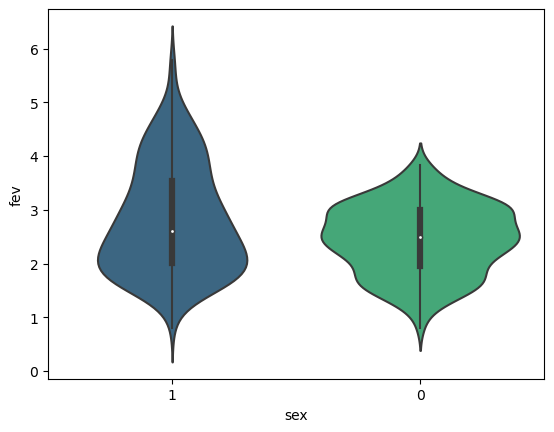

In [193]:
plt.clf()
sns.violinplot(x='sex',y='fev',data=datos,palette='viridis')
plt.show()

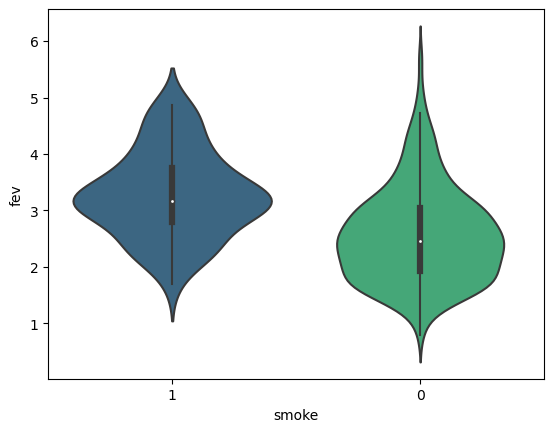

In [82]:
plt.clf()
sns.violinplot(x='smoke',y='fev',data=datos,palette='viridis')
plt.show()

### Aunque en el gráfico de barras se observa que las variables que más relación tienen con la variable objetivo son "Height", "Age" y "Sex", puesto que el estudio es sobre los efectos del tabaco en la función pulmonar sacamos los gráficos de la distribución de los datos en función de las dos variables dicotómicas "Sex" y "Smoke", para terminar de decidir el tercer predictor.
### Observamos lo siguiente:
    - Existe una diferencia entre la función pulmonar de hombres y mujeres, debido probablemente a características biológicas. 
    - La distribución del flujo pulmonar entre la población fumadora es uniforme, no presentan registros de flujo pulmonar más bajos que los correspondientes a la población no fumadora, el motivo, probablemente se deba a la existencia de muy pocos registros de fumadores, que, junto con el hecho de que, lo normal, sea que hayan comenzado su hábito de tabaquismo recientemente, el tiempo trascurrido desde el comienzo del tabaquismo no es suficiente para observar variaciones en el flujo de espiración.

### Los tres predictores escogidos son: "Height", "Age" y "Smoke". Escogemos "Smoke" porque el proyecto trata de mostrar la influencia del hábito de tabaquismo en el flujo pulmonar. 

# Pregunta 3
# Ajusta el modelo de regresión que contiene los 3 predictores que has decidido en el apartado anterior en el propio conjunto de entrenamiento (no hace falta hacer partición) y muestra el summary de dicho modelo.

In [194]:
def ols_formula(df, dependent_var, *excluded_cols):
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)
form=ols_formula(datos,'fev','sex','seqnbr','subjid')
form


'fev ~ age + height + smoke'

In [195]:
modeloA = ols(form,data=datos).fit()
modeloA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     715.7
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          1.86e-205
Time:                        23:15:06   Log-Likelihood:                -356.98
No. Observations:                 654   AIC:                             722.0
Df Residuals:                     650   BIC:                             739.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7262      0.233    -20.322      0.000      -5.183      -4.270
smoke[T.0]     0.1102      0.060      1.837      0.067      -0.008       0.228
age            0.0597      0.010      6.247      0.000       0.041       0.079
height         0.1091      0.005     23.115      0.000       0.100       0.118
==============================================================================
Omnibus:                       31.673   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.104
Skew:                           0.292   Prob(JB):                     1.20e-14
Kurtosis:                       4.419   Cond. No.                         886.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
y, X = patsy.dmatrices(form, datos, return_type='dataframe')

X

Intercept  smoke[T.0]   age  height
0          1.0         1.0   9.0    57.0
1          1.0         1.0   8.0    67.5
2          1.0         1.0   7.0    54.5
3          1.0         1.0   9.0    53.0
4          1.0         1.0   9.0    57.0
5          1.0         1.0   8.0    61.0
6          1.0         1.0   6.0    58.0
7          1.0         1.0   6.0    56.0
8          1.0         1.0   8.0    58.5
9          1.0         1.0   9.0    60.0
10         1.0         1.0   6.0    53.0
11         1.0         1.0   8.0    54.0
12         1.0         1.0   8.0    58.5
13         1.0         1.0   8.0    60.5
14         1.0         1.0   8.0    58.0
15         1.0         1.0   7.0    53.0
16         1.0         1.0   5.0    50.0
17         1.0         1.0   6.0    53.0
18         1.0         1.0   9.0    59.0
19         1.0         1.0   9.0    61.5
20         1.0         1.0   5.0    49.0
21         1.0         1.0   5.0    52.5
22         1.0         1.0   4.0    48.0
23         1.0         1.0   7.0    62.5
24         1.0         1.0   9.0    65.0
25         1.0         1.0   3.0    51.5
26         1.0         1.0   9.0    60.0
27         1.0         1.0   5.0    52.0
28         1.0         1.0   8.0    60.0
29         1.0         1.0   9.0    60.0
30         1.0         1.0   5.0    49.0
31         1.0         1.0   9.0    65.5
32         1.0         1.0   8.0    60.0
33         1.0         1.0   7.0    57.5
34         1.0         1.0   5.0    52.0
35         1.0         1.0   8.0    59.0
36         1.0         1.0   9.0    59.0
37         1.0         1.0   8.0    55.0
38         1.0         1.0   8.0    57.0
39         1.0         1.0   8.0    57.0
40         1.0         1.0   9.0    60.0
41         1.0         1.0   8.0    59.0
42         1.0         1.0   5.0    51.0
43         1.0         1.0   8.0    57.0
44         1.0         1.0   5.0    50.0
45         1.0         1.0   9.0    57.0
46         1.0         1.0   7.0    54.0
47         1.0         1.0   8.0    52.5
48         1.0         1.0   6.0    55.0
49         1.0         1.0   8.0    60.5
50         1.0         1.0   5.0    54.5
51         1.0         1.0   9.0    61.5
52         1.0         1.0   9.0    62.0
53         1.0         1.0   8.0    54.5
54         1.0         1.0   6.0    54.0
55         1.0         1.0   9.0    57.0
56         1.0         1.0   9.0    62.5
57         1.0         1.0   7.0    60.0
58         1.0         1.0   4.0    50.0
59         1.0         1.0   8.0    57.5
60         1.0         1.0   8.0    60.0
61         1.0         1.0   8.0    60.0
62         1.0         1.0   6.0    51.0
63         1.0         1.0   4.0    49.0
64         1.0         1.0   8.0    59.0
65         1.0         1.0   6.0    57.5
66         1.0         1.0   9.0    58.0
67         1.0         1.0   7.0    55.5
68         1.0         1.0   5.0    52.0
69         1.0         1.0   9.0    60.5
70         1.0         1.0   8.0    57.0
71         1.0         1.0   8.0    58.0
72         1.0         1.0   9.0    60.0
73         1.0         1.0   9.0    59.0
74         1.0         1.0   9.0    59.5
75         1.0         1.0   7.0    56.0
76         1.0         1.0   5.0    53.0
77         1.0         1.0   5.0    51.0
78         1.0         1.0   9.0    69.0
79         1.0         1.0   6.0    53.0
80         1.0         1.0   7.0    57.0
81         1.0         1.0   6.0    53.0
82         1.0         1.0   8.0    63.0
83         1.0         1.0   8.0    54.5
84         1.0         1.0   7.0    58.0
85         1.0         1.0   8.0    63.0
86         1.0         1.0   7.0    52.0
87         1.0         1.0   9.0    61.5
88         1.0         1.0   5.0    52.5
89         1.0         1.0   9.0    62.0
90         1.0         1.0   9.0    61.5
91         1.0         1.0   9.0    64.5
92         1.0         1.0   7.0    57.5
93         1.0         1.0   8.0    60.0
94         1.0         1.0   8.0    60.0
95         1.0         1.0   9.0    61.0
96         1.0         1.0  

In [86]:
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     715.7
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          1.86e-205
Time:                        20:46:39   Log-Likelihood:                -356.98
No. Observations:                 654   AIC:                             722.0
Df Residuals:                     650   BIC:                             739.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7262      0.233    -20.322      0.000      -5.183      -4.270
smoke[T.0]     0.1102      0.060      1.837      0.067      -0.008       0.228
age            0.0597      0.010      6.247      0.000       0.041       0.079
height         0.1091      0.005     23.115      0.000       0.100       0.118
==============================================================================
Omnibus:                       31.673   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.104
Skew:                           0.292   Prob(JB):                     1.20e-14
Kurtosis:                       4.419   Cond. No.                         886.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### El coeficiente de determinación R2 indica que aproximadamente el 77% (76,8%) de la variabilidad en la variable dependiente puede ser explicada por las variables independientes en el modelo de regresión lineal.
### El parámetro de altura nos indica lo sigiente: ceteris paribus, un aumento de una unidad en la variable altura (un inch) se asocia con un aumento de 0´1091 litros por segundo en fev. 

# Pregunta 4
# Aplica validación cruzada repetida para tu modelo con nuestra querida función cross_val_lin y una semilla conformada por los 4 últimos dígitos de tu documento de identidad. Muestra el boxplot de sesgo-varianza de las estimaciones.

In [197]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# Función para comparación por validación cruzada

def cross_val_lin(formula,data,seed=3998):
    y,X=patsy.dmatrices(formula,data,return_type='dataframe')
    model = LinearRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=seed)
    scores = cross_val_score(model, X, y, cv=cv)
    print('Modelo: ' + formula)
    print('Coeficiente de determinación R2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
    return(scores)
    


Modelo: fev ~ age + height + smoke
Coeficiente de determinación R2: 0.761 (0.029)


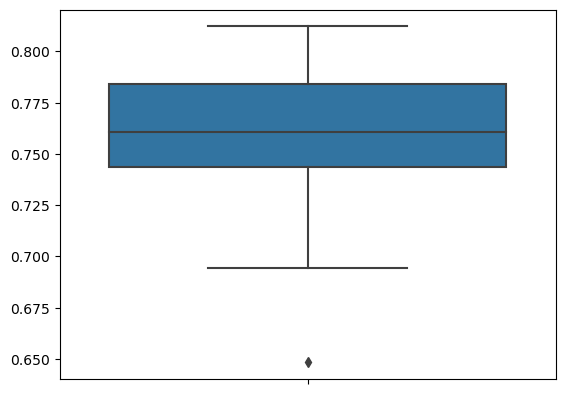

In [198]:
#Validación cruzada
rand_state = 3998
scores = cross_val_lin(formula=form, data=datos, seed=rand_state)
# Boxplot sesgo-varianza
sns.boxplot(y=scores)
plt.show()

### Con los datos obtenidos de R2 y desviación típica observamos que el R2 medio de las 100 repeticiones del modelo es del 76%, además la variabilidad que podemos encontrar en diferentes conjuntos de datos para el R2 es de 0´029, esto sugiere que el modelo es estable y generaliza bien a datos nuevos.
### Por tanto, sin más datos disponibles, podemos suponer que el modelo no se encuentra sobreajustado.

# Pregunta 5
# Indica el código necesario para leer el conjunto de datos "IPI_Esp.xlsx" y muestra su cabeza.

In [2]:
ipi = pd.read_excel("DATOS/IPI_Esp.xlsx")
ipi.head()

Date  IPI Nacional
0      1975M01        70.658
1      1975M02        72.180
2      1975M03        75.732
3      1975M04        74.844
4      1975M05        74.210

# Pregunta 6
# Convierte el conjunto en una serie temporal legible para Python y representa gráficamente la evolución.

In [3]:
#Conversión en serie temporal legible
ipi['Date'] = ipi['Date'].str.replace('M', '-')
ipi['Date']

0          1975-01
1          1975-02
2          1975-03
3          1975-04
4          1975-05
          ...     
534        2019-07
535        2019-08
536        2019-09
537        2019-10
538        2019-11
Name: Date, Length: 539, dtype: object

In [4]:
#Convertir en datatime
ipi['Date'] = pd.to_datetime(ipi['Date'])
ipi['Date']

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_19712\261652790.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ipi['Date'] = pd.to_datetime(ipi['Date'])


0     1975-01-01
1     1975-02-01
2     1975-03-01
3     1975-04-01
4     1975-05-01
         ...    
534   2019-07-01
535   2019-08-01
536   2019-09-01
537   2019-10-01
538   2019-11-01
Name: Date, Length: 539, dtype: datetime64[ns]

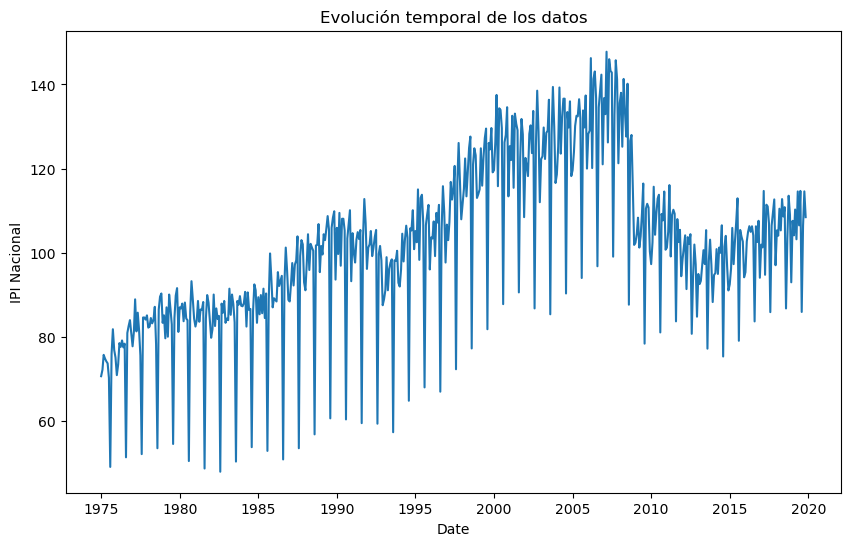

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(ipi['Date'], ipi['IPI Nacional'], marker='', linestyle='-')
plt.xlabel('Date')
plt.ylabel('IPI Nacional')
plt.title('Evolución temporal de los datos')
plt.show()

In [6]:
#Sustituimos el indice por la fecha.
ipi.set_index(['Date'],inplace=True)
ipi.index=pd.to_datetime(ipi.index)
ipi

IPI Nacional
Date                    
1975-01-01        70.658
1975-02-01        72.180
1975-03-01        75.732
1975-04-01        74.844
1975-05-01        74.210
...                  ...
2019-07-01       114.698
2019-08-01        85.929
2019-09-01       106.408
2019-10-01       114.592
2019-11-01       108.464

[539 rows x 1 columns]

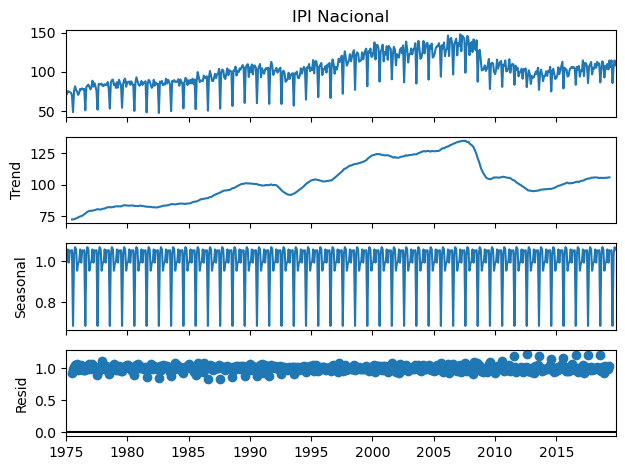

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

ipi_desc_Mul = seasonal_decompose(ipi['IPI Nacional'], model='multiplicative',period=12)
ipi_desc_Mul.plot()
plt.show()

### Del gráfico obtenido de la evolución podemos obtener los siguientes resultados:
    - Hasta 2010 se ve una tendencia positiva, a partir de este mes se observa un descenso brusco y un mantenimiento más o menos estable hasta 2020. 
    - Podemos observar estacionalidad a lo largo de todo el modelo. 
    - A partir de 2010, cuando se produce el descenso brusco, podemos observar que la volatilidad dismininuye. 

# Pregunta 7
# Toma una partición con ventana de entrenamiento (todo el histórico hasta diciembre de 2017) y prueba (2018 y 2019). Ajusta el modelo de suavizado que consideres más adecuado a la luz de las características de la serie. Evalua el modelo en términos de error y adecuación de los residuos. ¿El modelo satisface las condiciones residuales en cuanto a autocorrelaciones?

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Realizamos la partición de los datos. Datos_train hasta 2017 y Datos_test desde 2017 hasta 2019
ipi_train = ipi[:'2017']
ipi_test = ipi['2018':]

(ipi_train.shape, ipi_test.shape)

((516, 1), (23, 1))

### Como hemos visto nuestro gráfico tiene tanto tendencia como estacionalidad, así que tendremos que escoger un modelo de suavizado para ambas caracerísticas: Holt-Winters Aditivo (escogemos aditivo en vez de multiplicativo debido a que la tendencia y la estacionalidad son relativamente estables)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
# Función para evaluar modelo
def eval_model(model,tr,tst,name='Model',lags=12):
    lb = np.mean(sm.stats.acorr_ljungbox(model.resid, lags=lags, return_df=True).lb_pvalue)
    pred = model.forecast(steps=len(tst))
    fig1, ax = plt.subplots()
    ax.plot(tr, label='training')
    ax.plot(tst, label='test')
    ax.plot(pred, label='prediction')
    plt.legend(loc='upper left')
    tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
    plt.title(tit)
    plt.ylabel('Pasajeros')
    plt.xlabel('Date')
    plt.show()
    print(lb)

In [10]:
import matplotlib.pyplot as plt

# Ajusta el modelo Holt-Winters
hw_add = ExponentialSmoothing(ipi_train,trend='add', damped_trend=False, seasonal='add').fit()

# Realiza las predicciones
predictions_test = hw_add.predict(start=ipi_test.index[0], end=ipi_test.index[-1])



C:\Users\Usuario1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


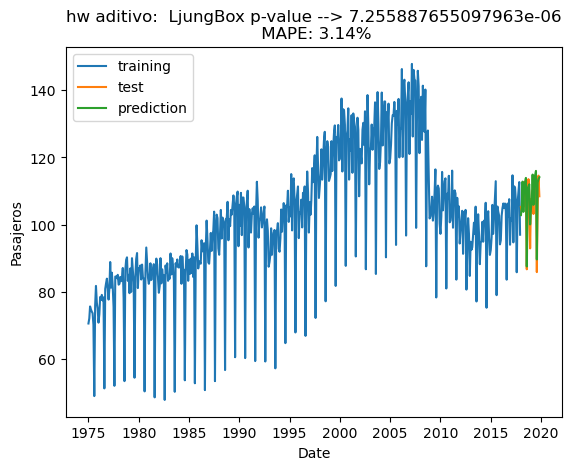

7.255887655097963e-06


In [11]:
eval_model(hw_add,ipi_train,ipi_test,'hw aditivo')

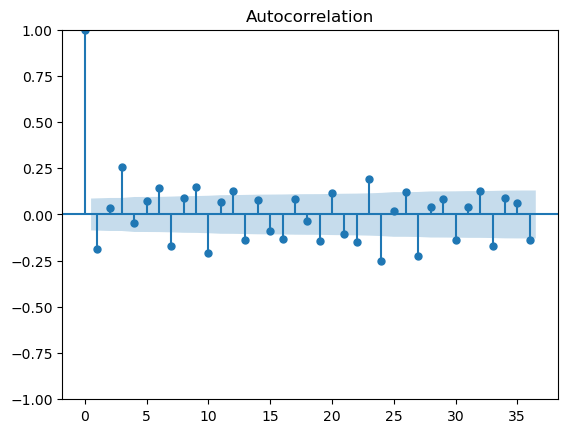

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(hw_add.resid, lags=36)
plt.show()

### El MAPE de nuestro modelo es de 3´14%, lo que indica que el modelo tiene bastante precisión
### Sacando la gráfico de correlación de residuos observamos que podría existir correlación en los residuos, ya que encontramos muchos lags fuera de la zona de confianza (siendo por tanto significativos). Estudiamos más profundamente la correlación de los errores en las siguientes preguntas. 

# Pregunta 8
# Presenta los correlogramas simple y parcial de la serie diferenciada en lo regular y estacional para el conjunto de entrenamiento.

In [13]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

In [14]:
test_stationarity(ipi_train)

Results of Dickey-Fuller Test:
Test Statistic                  -1.736712
p-value                          0.412303
#Lags Used                      19.000000
Number of Observations Used    496.000000
Critical Value (1%)             -3.443603
Critical Value (5%)             -2.867385
Critical Value (10%)            -2.569883
dtype: float64


### Lo primero que realizamos es el test de Dickey-Fuller es ver si se rechaza la hipotesis nula de no estacionariedad, como podemos observar, el p-valor es de 0´4123, por tanto no tenemos suficiente evidencia para rechazar la hipótesis nula: nuestra serie temporal es NO estacionaria.
### El análisis y modelado de los datos de una serie estcionaria es más sencillo que de una seire estacionaria, por tanto, vamos a aplicar la diferencia regular para convertir nuestra serie temporal en una serie estacionaria y vamos a aplicar la diferencia estacionaria a nuestra serie para eliminar la autocorrelación

Results of Dickey-Fuller Test:
Test Statistic                -8.199955e+00
p-value                        7.275867e-13
#Lags Used                     1.600000e+01
Number of Observations Used    4.860000e+02
Critical Value (1%)           -3.443877e+00
Critical Value (5%)           -2.867505e+00
Critical Value (10%)          -2.569947e+00
dtype: float64


<Axes: xlabel='Date'>

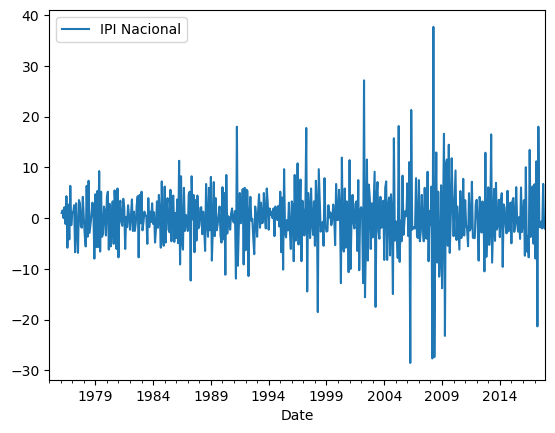

In [15]:
ipi_train_diff_1= ipi_train.diff(periods=1)

ipi_train_diff_1_12 = ipi_train_diff_1.diff(periods=12)
test_stationarity(ipi_train_diff_1_12.dropna())

ipi_train_diff_1_12.plot()

### Al realizar la diferencia regular y estacionaria de la serie podemos observar como el p-valor de Dickey-Fuller es prácticamente 0, pudiendo así rechazar la hipótesis nula frente a la alternativa: nuestra serie temporal ahora si es estacionaria.

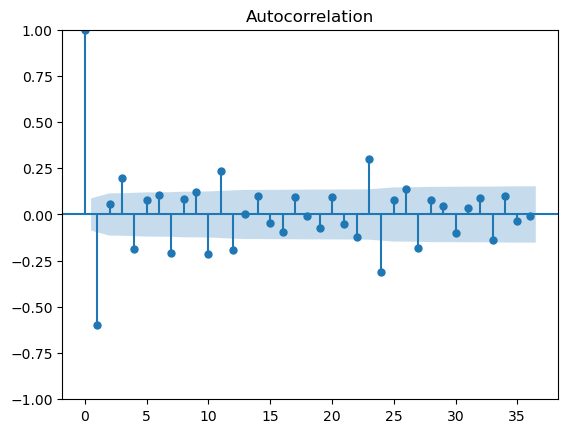

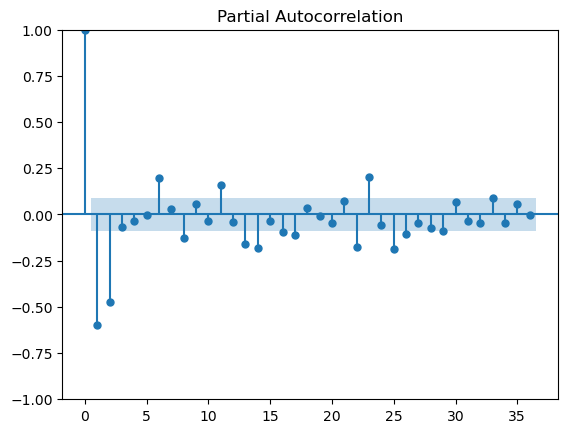

In [17]:
# Correlograma simple ACF
plot_acf(ipi_train_diff_1_12.dropna(), lags=36)
# Correlograma parcial PACF
plot_pacf(ipi_train_diff_1_12.dropna(), lags=36)
plt.show()

### Sacando los correlogramas obtenidos, proponemos el siguiente modelo ARIMA (2,1,1)(1,1,2).
### Elegimos este modelo debido a la disminución de los rezagos tras observar elevada autocorrelación en primeros.

# Pregunta 9
# Ajusta ese modelo que propones y evalúa su capacidad de ajuste en test y la adecuación de residuos.

In [31]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
arima1 = SARIMAX(ipi_train, 
                order = (2, 1, 1), 
                seasonal_order =(1, 1, 2, 12))
  

C:\Users\Usuario1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
arima_1 = arima1.fit()
arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                            IPI Nacional   No. Observations:                  516
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1410.364
Date:                                 Wed, 28 Feb 2024   AIC                           2834.729
Time:                                         18:46:27   BIC                           2864.273
Sample:                                     01-01-1975   HQIC                          2846.319
                                          - 12-01-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6756      0.088     -7.690      0.000      -0.848      -0.503
ar.L2         -0.3578      0.062     -5.801      0.000      -0.479      -0.237
ma.L1         -0.2259      0.081     -2.783      0.005      -0.385      -0.067
ar.S.L12      -0.3793      0.142     -2.669      0.008      -0.658      -0.101
ma.S.L12      -0.0945      0.126     -0.753      0.452      -0.340       0.152
ma.S.L24      -0.4862      0.066     -7.340      0.000      -0.616      -0.356
sigma2        15.6795      0.744     21.086      0.000      14.222      17.137
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               107.51
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.86   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

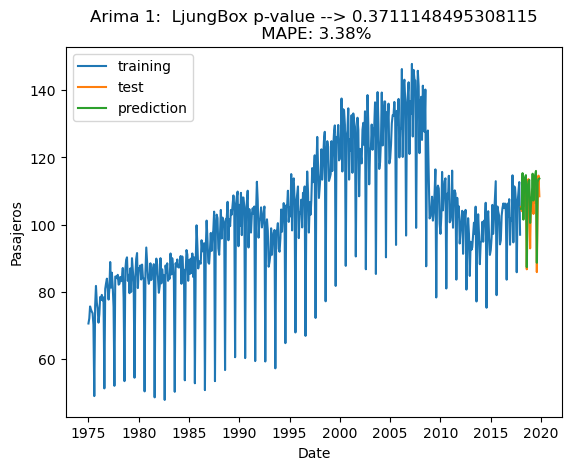

0.3711148495308115


In [34]:
eval_model(arima_1,ipi_train,ipi_test,'Arima 1')

In [35]:
import scipy.stats as stats
import seaborn as sns

# Función para evaluar residuos a través de contrastes de hipótesis
def residcheck(residuals, lags):
    
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(sm.stats.acorr_ljungbox(x=residuals, lags=lags).lb_pvalue)
    norm_p_val =  stats.jarque_bera(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
        
      
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));
    
    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    sns.despine()
    plt.tight_layout();
    plt.show()
    print("** Mean of the residuals: ", np.around(resid_mean,2))
        
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), 
        "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
        
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3),
        "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
        
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), 
        "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    return ts_ax, acf_ax, kde_ax   
 
  

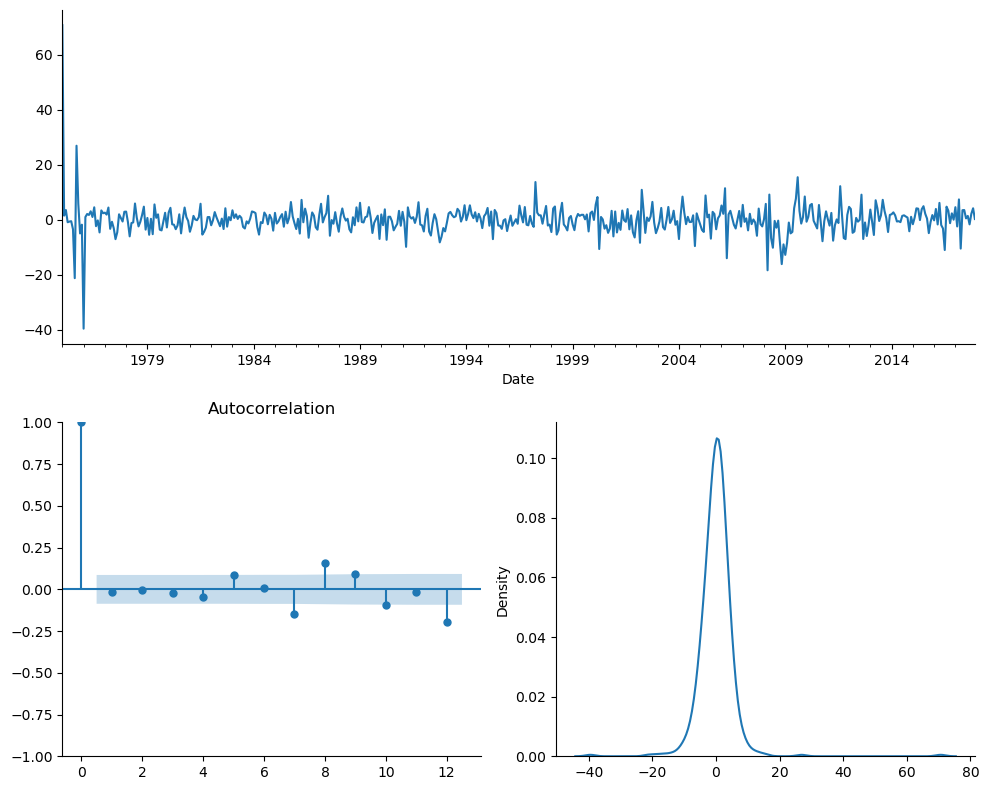

** Mean of the residuals:  0.06

** Ljung Box Test, p-value: 0.371 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<Axes: xlabel='Date'>,
 <Axes: title={'center': 'Autocorrelation'}>,
 <Axes: ylabel='Density'>)

In [36]:
residcheck(arima_1.resid,12)

### Tras observar los resultados del modelo observamos lo siguiente: 
    - Test de Ljung Box: p-value de 0´557 no existe evidencia para rechazar la hipótesis nula frente a la alternativa, por tanto aceptamos la hipóties nula de que no existe autocorrelación en la serie temporal.
    - MAPE: es superior en el modelo ARIMA al modelo suavizado, por tanto se ajusta peor al modelo. 
### El modelo ARIMA elegido predice mejor la serie temporal al suavizado. Vamos a buscar el mejor modelo ARIMA que se ajusta a nuestra serie temporal y si este modelo es mejor a nuestro modelo suavizado.

In [37]:
def eval_model_Aarima(model,tr,tst,name='Model',lags=12):
    lb = np.mean(sm.stats.acorr_ljungbox(model.resid(), lags=lags, return_df=True).lb_pvalue)
    pred = model.predict(n_periods=len(tst))
    fig1, ax = plt.subplots()
    ax.plot(tr, label='training')
    ax.plot(tst, label='test')
    ax.plot(pred, label='prediction')
    plt.legend(loc='upper left')
    tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
    plt.title(tit)
    plt.ylabel('Serie')
    plt.xlabel('Date')
    plt.show()
    model.plot_diagnostics(figsize=(14,10))
    plt.show()

In [38]:
import pmdarima as pm

# Ajustamos modelo arima step-wise con métrica AIC para la serie de vuelos
arima_auto = pm.auto_arima(ipi_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2880.720, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3328.763, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3090.737, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2931.010, Time=0.25 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2898.257, Time=0.33 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2983.426, Time=0.27 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=2855.221, Time=0.86 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=2916.783, Time=0.41 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=2856.700, Time=1.71 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2857.343, Time=1.77 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=2883.079, Time=1.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=2947.542, Time=0.70 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=2835.993, Time=1.18 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=2853.520, Time=0.78 sec
 ARIMA(2,1,1)(2,1,0

In [39]:
print(arima_auto.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  516
Model:             SARIMAX(2, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1409.165
Date:                                 Wed, 28 Feb 2024   AIC                           2834.330
Time:                                         18:49:47   BIC                           2868.095
Sample:                                     01-01-1975   HQIC                          2847.576
                                          - 12-01-2017                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6732      0.088     -7.619      0.000      -0.846      -0

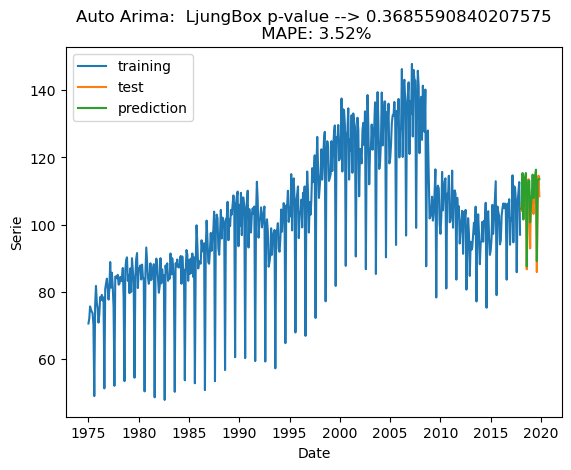

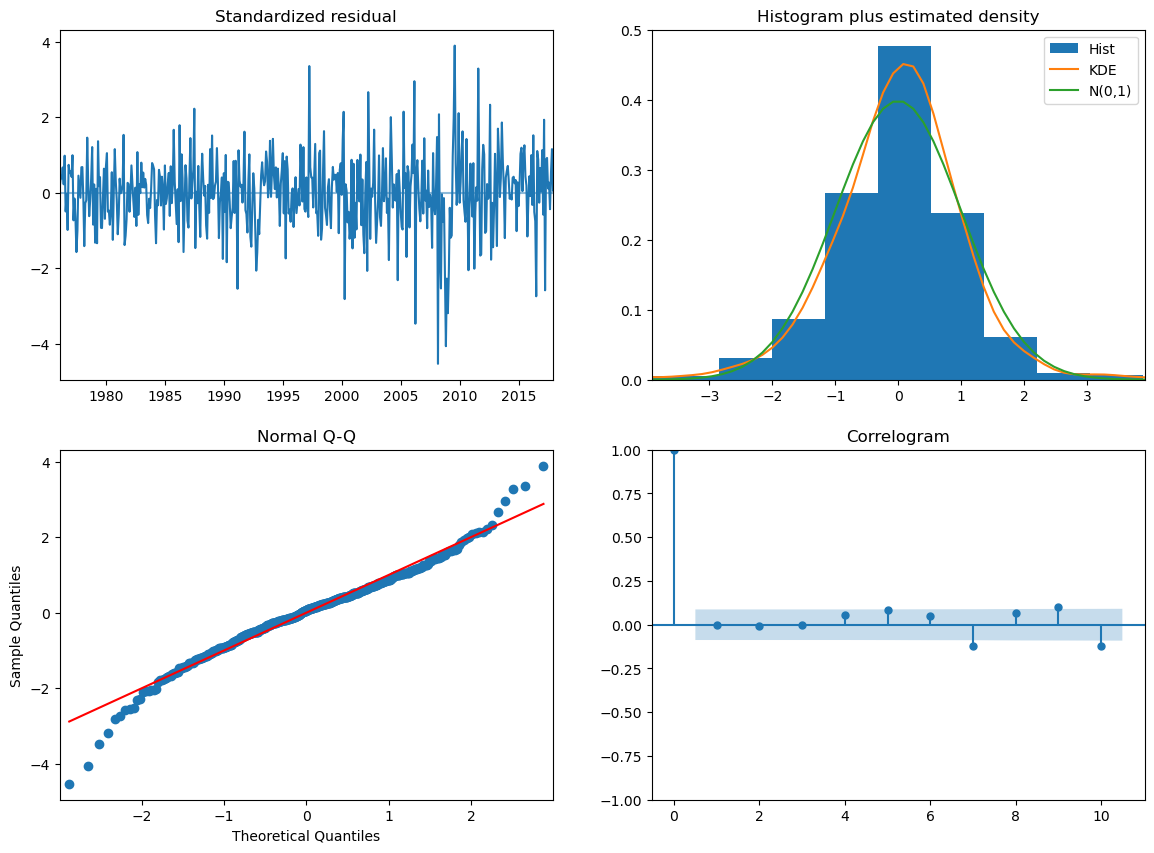

In [40]:
eval_model_Aarima(arima_auto,ipi_train,ipi_test,'Auto Arima')

### El mejor modelo ARIMA para nuestra serie temporal es (2,1,1)(1,1,2), sien embargo el MAPE de este modelo sigue siendo superior al de mi modelo suavizado.

# Pregunta 10
# Indica el código necesario para leer el archivo "clientes_cluster.csv" y mostrar sus primeros registros.

In [28]:
clientes = pd.read_csv("DATOS/clientes_cluster.csv")
clientes.head()

CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.0                15.0                    39.0
1           2    Male  21.0                15.0                     NaN
2           3  Female  20.0                16.0                     6.0
3           4  Female  23.0                16.0                     NaN
4           5  Female  31.0                 NaN                    40.0

# Pregunta 11
# Evalúa la incidencia de valores perdidos por variable e imputa el archivo mediante el método multivariante basado en el algoritmo Iterativo por cadenas de Markov (IterativeImputer), generando un nuevo archivo completo "clientes_imputed" del que se mostrará la información para comprobar que efectivamente todos los registros contienen valores válidos. 

In [4]:
#Incidencia de missings por variable
clientes.isna().sum()

CustomerID                 0
Gender                    15
Age                       13
Annual Income (k$)         9
Spending Score (1-100)    18
dtype: int64

### Como podemos observar todas las variables excepto CustomerID tiene valores NaN. Para evaluar si tiene un peso elevado o no tendremos que saber cuántos valores de cada categoría tenemos en la data. 

In [5]:
clientes.isna().mean()

CustomerID                0.000
Gender                    0.075
Age                       0.065
Annual Income (k$)        0.045
Spending Score (1-100)    0.090
dtype: float64

### Con respecto al total de datos vemos que todos tienen un porcentaje bajo de valores perdidos, siendo la variable Spending Score la variable con mayor porcentaje de valores perdidos con un 9%

In [6]:
#Cambiamos variable Dummy (Hombre=1; Mujer=0) y eliminamos variable ID.
mapeo = {'Male': 1, 'Female': 0}
clientes['Gender'] = clientes['Gender'].replace(mapeo)

clientes2=clientes.drop(columns='CustomerID')

In [7]:
clientes2

Gender   Age  Annual Income (k$)  Spending Score (1-100)
0       1.0  19.0                15.0                    39.0
1       1.0  21.0                15.0                     NaN
2       0.0  20.0                16.0                     6.0
3       0.0  23.0                16.0                     NaN
4       0.0  31.0                 NaN                    40.0
..      ...   ...                 ...                     ...
195     0.0  35.0               120.0                    79.0
196     0.0  45.0               126.0                    28.0
197     1.0  32.0               126.0                    74.0
198     1.0  32.0               137.0                    18.0
199     1.0  30.0               137.0                    83.0

[200 rows x 4 columns]

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer(missing_values=np.nan)
clientes_imputed_iter = pd.DataFrame(iter_imputer.fit_transform(clientes2),
                                     columns=clientes2.columns)

clientes_imputed_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    float64
 1   Age                     200 non-null    float64
 2   Annual Income (k$)      200 non-null    float64
 3   Spending Score (1-100)  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Vemos qué ha ocurrido con las variables al realizar la imputación iterativa. Para ello vemos qué ha ocurrido con la variable con más proporción de nulos. 

In [29]:
clientes_nulos = clientes2[clientes2['Spending Score (1-100)'].isna()]

In [30]:
display(pd.concat([clientes_nulos.isna(), clientes_imputed_iter], axis=1))

Gender    Age  Annual Income (k$)  Spending Score (1-100)    Gender  \
1     False  False               False                    True  1.000000   
3     False  False               False                    True  0.000000   
16    False  False               False                    True  0.000000   
23    False  False               False                    True  1.000000   
24     True   True               False                    True  0.440045   
..      ...    ...                 ...                     ...       ...   
195     NaN    NaN                 NaN                     NaN  0.000000   
196     NaN    NaN                 NaN                     NaN  0.000000   
197     NaN    NaN                 NaN                     NaN  1.000000   
198     NaN    NaN                 NaN                     NaN  1.000000   
199     NaN    NaN                 NaN                     NaN  1.000000   

           Age  Annual Income (k$)  Spending Score (1-100)  
1    21.000000                15.0               58.152762  
3    23.000000                16.0               57.140722  
16   35.000000                21.0               50.949094  
23   31.000000                25.0               53.172921  
24   38.646711                28.0               49.229981  
..         ...                 ...                     ...  
195  35.000000               120.0               79.000000  
196  45.000000               126.0               28.000000  
197  32.000000               126.0               74.000000  
198  32.000000               137.0               18.000000  
199  30.000000               137.0               83.000000  

[200 rows x 8 columns]

### Como podemos observar en todas las varaibles menos, parece, "Annual Income", se imputa un valor con decimales, cuando nuestro DF no tiene tales valores, comprobamos que la variable Annual Income no imputa valores con decimales y eliminamos los mismos en el resto de columnas, este proceso es especialmente importante con la variable Gender, ya que es una variable Dummy (0-1)

In [33]:
clientes_imputed_iter['Annual Income (k$)'].unique()

array([ 15.        ,  16.        ,  60.58479407,  17.        ,
        18.        ,  19.        ,  20.        ,  21.        ,
        23.        ,  24.        ,  25.        ,  28.        ,
        29.        ,  30.        ,  33.        ,  34.        ,
        37.        ,  38.        ,  39.        ,  40.        ,
        42.        ,  43.        ,  60.58407575,  44.        ,
        46.        ,  47.        ,  48.        ,  49.        ,
        50.        ,  54.        ,  57.        ,  58.        ,
        60.58734393,  59.        ,  60.        ,  61.        ,
        62.        ,  63.        ,  60.58558403,  64.        ,
        65.        ,  60.59666331,  67.        ,  60.59676329,
        69.        ,  70.        ,  60.61106232,  71.        ,
        60.58107953,  72.        ,  73.        ,  74.        ,
        75.        ,  76.        ,  77.        ,  78.        ,
        79.        ,  60.56103722,  81.        ,  85.        ,
        86.        ,  87.        ,  88.        ,  93.  

### Como podemos observar también se han imputado valores con decimales a los valores nulos, cuando en un primer momento no teníamos decimales en esta variable, por tanto eliminamos estos decimales para mantener la estructura del dato inicial (especialmente importante para la variable Gender)

In [35]:
clientes_imputed_iter[['Gender', 'Age','Annual Income (k$)','Spending Score (1-100)']] = np.round(clientes_imputed_iter[['Gender', 'Age','Annual Income (k$)','Spending Score (1-100)']])

In [38]:
#Comprobamos que se han transformado correctamente la variable Gender, quedandose como una variable Dummy

clientes_imputed_iter['Gender'].unique()

array([1., 0.])

In [39]:
clientes_imputed_iter

Gender   Age  Annual Income (k$)  Spending Score (1-100)
0       1.0  19.0                15.0                    39.0
1       1.0  21.0                15.0                    58.0
2       0.0  20.0                16.0                     6.0
3       0.0  23.0                16.0                    57.0
4       0.0  31.0                61.0                    40.0
..      ...   ...                 ...                     ...
195     0.0  35.0               120.0                    79.0
196     0.0  45.0               126.0                    28.0
197     1.0  32.0               126.0                    74.0
198     1.0  32.0               137.0                    18.0
199     1.0  30.0               137.0                    83.0

[200 rows x 4 columns]

# Pregunta 12
# Explora los métodos de clustering jerárquico para formar grupos de clientes similares en cuanto a su comportamiento en estas 4 variables disponibles y presenta sus dendogramas. Si lo consideras necesario, escala los datos previamente.

### Para poder realizar correctamente los dendogramas vamos a escalar las variables para tener la misma medida para todas las variables. Para escalar las variables, y puesto que Gender es una variable Dummy, tenemos que separar esta variable del resto del DF.
### Una vez escaladas las variables, podemos unir la variable Gender al resto de variables ya escaladas.

In [45]:
from sklearn.preprocessing import StandardScaler

dummy_cont = clientes_imputed_iter.drop(columns='Gender')

scaler = StandardScaler()
dummy_cont_sc = pd.DataFrame(scaler.fit_transform(dummy_cont),
                         columns=dummy_cont.columns)

dummy_cont_sc = pd.concat([dummy_cont_sc, clientes_imputed_iter['Gender']], axis=1)
dummy_cont_sc

Age  Annual Income (k$)  Spending Score (1-100)  Gender
0   -1.466169           -1.759931               -0.463292     1.0
1   -1.315831           -1.759931                0.315350     1.0
2   -1.391000           -1.721345               -1.815669     0.0
3   -1.165493           -1.721345                0.274369     0.0
4   -0.564142            0.015049               -0.422311     0.0
..        ...                 ...                     ...     ...
195 -0.263467            2.291654                1.175954     0.0
196  0.488222            2.523173               -0.914084     0.0
197 -0.488973            2.523173                0.971048     1.0
198 -0.488973            2.947624               -1.323895     1.0
199 -0.639311            2.947624                1.339878     1.0

[200 rows x 4 columns]

In [51]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from time import time


def plot_dendogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      np.arange(1, model.children_.shape[0] + 1)])
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.show()


ward :	0.00s


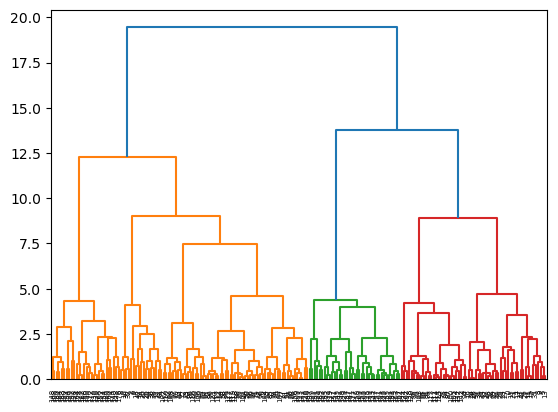

average :	0.00s


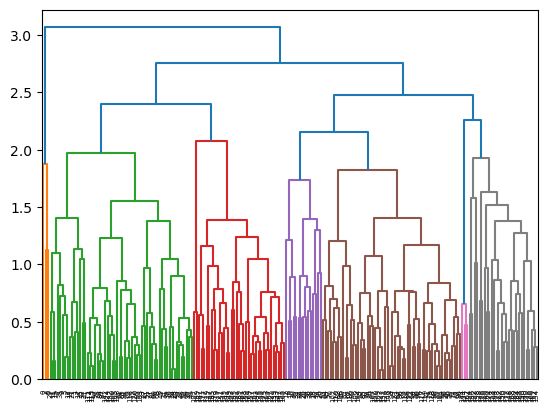

complete :	0.00s


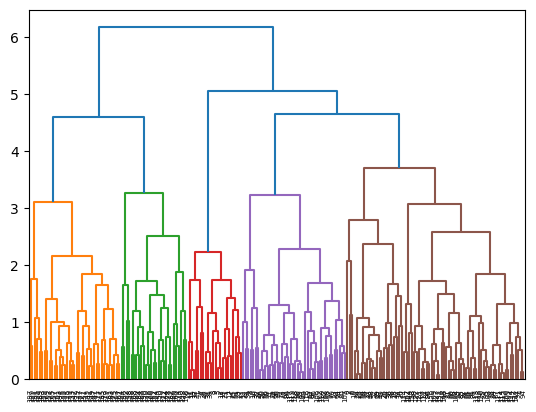

single :	0.01s


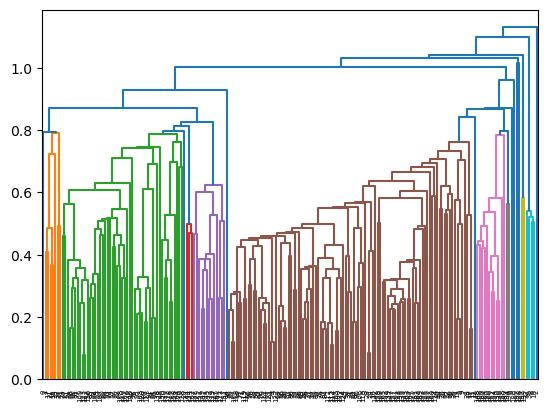

In [53]:
from sklearn.cluster import AgglomerativeClustering

dummy_cont_sc = dummy_cont_sc.reset_index(drop=True)

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=None,
                            distance_threshold = 0)
    t0 = time()
    clustering.fit(dummy_cont_sc)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    
    plt.clf()
    plot_dendogram(clustering)


### El método más adecuado según los dendogramas es ward, en función del número de grupos que quisiera cortaría en un punto u otro del dendograma, ya que el número de grupos depende del analista [en vista de la apariencia del dendograma yo me decantaría por un corte en el 10 con 5 grupos] (aunque podríamos escoger más grupos)

# Pregunta 13
# Explora el clustering K-means con distinto número de grupos y decide cuantos el número de clusters óptimo para la solución según este método. Comenta las métricas de evaluación

In [73]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

clientes_scaled = dummy_cont_sc
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=clientes_scaled)

C:\Users\Usuario1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=25, random_state=123)

In [74]:
from scipy.spatial.distance import cdist, pdist

def scree_plot_kmeans(data,n_max):
    range_n_clusters=range(2,n_max)
    clientes_scaled = dummy_cont_sc
    inertias=[]
    silhouette=[]
    var_perc=[]
    
    for n_clusters in range_n_clusters:
        modelo_kmeans =KMeans(
                                n_clusters=n_clusters,
                                n_init=20,
                                random_state=123)
        modelo_kmeans.fit(clientes_scaled)
        cluster_labels = modelo_kmeans.fit_predict(clientes_scaled)
        inertias.append(modelo_kmeans.inertia_)
        silhouette.append(silhouette_score(clientes_scaled, cluster_labels))
        tss=sum(pdist(clientes_scaled)**2)/clientes_scaled.shape[0]
        bss=tss-modelo_kmeans.inertia_
        var_perc.append(bss/tss*100)
    fig, ax = plt.subplots(1,3,figsize=(16,6))
    ax[0].plot(range_n_clusters,inertias,marker='o')
    ax[0].set_title("Scree plot Varianza intra")
    ax[0].set_xlabel('Número clusters')
    ax[0].set_ylabel('Intra-cluster (inertia)')
  
    ax[1].plot(range_n_clusters, silhouette, marker='o')
    ax[1].set_title("Scree plot silhouette")
    ax[1].set_xlabel('Número clusters')
    ax[1].set_ylabel('Media índices silhouette');
  
    ax[2].plot(range_n_clusters, var_perc, marker='o')
    ax[2].set_title("Scree plot % Varianza")
    ax[2].set_xlabel('Número clusters')
    ax[2].set_ylabel('% de varianza explicada')
    
    

C:\Users\Usuario1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

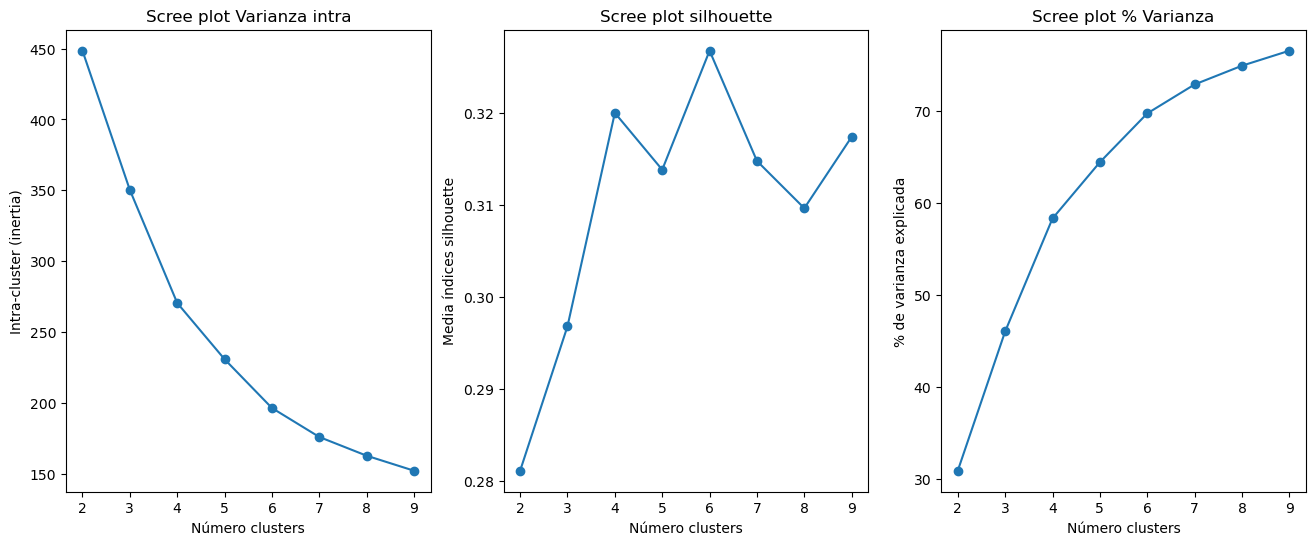

In [75]:
scree_plot_kmeans(dummy_cont_sc,10)
plt.show()

### Según los resultados obtenidos encontraríamos 6 clusters, uno más de los que intuíamos con el dendograma. Se puede observar como según vamos aumentando en el número de clusters la ganancia es cada vez menor, siendo especialmente evidente a partir del 6 cluster (número de clusters óptimo establecido en el modelo).

In [76]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=6, n_init=30)
kmeans_model.fit(dummy_cont_sc)
clientes_imputed_iter['Cluster'] = kmeans_model.predict(dummy_cont_sc)
clientes_imputed_iter

C:\Users\Usuario1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Gender   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1.0  19.0                15.0                    39.0        4
1       1.0  21.0                15.0                    58.0        4
2       0.0  20.0                16.0                     6.0        0
3       0.0  23.0                16.0                    57.0        4
4       0.0  31.0                61.0                    40.0        5
..      ...   ...                 ...                     ...      ...
195     0.0  35.0               120.0                    79.0        3
196     0.0  45.0               126.0                    28.0        2
197     1.0  32.0               126.0                    74.0        3
198     1.0  32.0               137.0                    18.0        2
199     1.0  30.0               137.0                    83.0        3

[200 rows x 5 columns]

In [144]:
pd.DataFrame(kmeans_model.cluster_centers_.round(2), columns=dummy_cont_sc.columns,
             index=['Centroid_0','Centroid_1','Centroid_2','Centroid_3','Centroid_4','Centroid_5'])


Age  Annual Income (k$)  Spending Score (1-100)  Gender
Centroid_0  0.63               -1.30                   -1.37    0.47
Centroid_1  1.32               -0.17                   -0.06    0.38
Centroid_2  0.25                1.14                   -1.35    0.48
Centroid_3 -0.45                1.04                    1.31    0.42
Centroid_4 -0.83               -1.30                    0.76    0.38
Centroid_5 -0.70               -0.07                   -0.09    0.40

In [143]:
#Para poder realizar un buen análisis de los centroides pasamos las variables no dummy a su medida original.

clientes_imputed_iter.groupby('Cluster').mean().round(2)

Gender    Age  Annual Income (k$)  Spending Score (1-100)   PC1   PC2
Cluster                                                                       
0          0.47  46.82               26.88                   16.88  1.53 -1.19
1          0.38  56.10               56.14                   48.81  0.99 -0.03
2          0.48  41.83               90.03                   17.41  1.02  1.19
3          0.42  32.50               87.44                   82.33 -1.34  0.95
4          0.38  27.45               26.90                   68.90 -1.00 -1.40
5          0.40  29.15               58.89                   48.02 -0.42 -0.14

In [81]:
#Para realizar un análisis de todos los klusters obtenemos los valores medios de cada variable.
clientes_imputed_iter.mean()

Gender                     0.415
Age                       38.505
Annual Income (k$)        60.610
Spending Score (1-100)    50.305
Cluster                    2.795
dtype: float64

### Análisis centroides: 
    - Cluster 0: clientes por encima de la edad media, con salario por debajo de la media y un gasto promedio también por debajo de la media
    - Cluster 1: clientes por encima de la edad media, con un salario cercano a la media (aunque inferior), y un promedio de gasto cercano a la media (aunque también inferior).
    - Cluster 2: clientes or encima de la edad media, con salarios superiores a la media pero promedio de gasto inferior a la media.
    - Cluster 3: clientes cercanos a la media en edad (aunque por debajo), salario y gasto superior a la media. 
    - Cluster 4: clientes por debajo de la media con ingresos inferiores a la media y gastos superiores a la misma. 
    - Cluster 5: clientes por debajo de la media, con ingresos y patrón de gasto cercanos a la media (aunque ligeramente inferiores).


# Pregunta 14
# De cara a la proyección de los grupos formados en el espacio de características y dado que estamos en R4. Nos planteamos reducir la dimensionalidad a 2 para poder interpretar con mayor claridad mediante un bonito biplot.

# Para llevar a cabo esta tarea, necesitaremos ajustar un PCA con 2 dimensiones a los datos de entrada al clustering que hemos generado, es decir, tal vez utilizamos el conjunto de datos escalado si lo consideramos necesario. Mostraremos las cargas de las variables en las componentes y haremos una pequeña interpretación inicial de las 2 componentes.

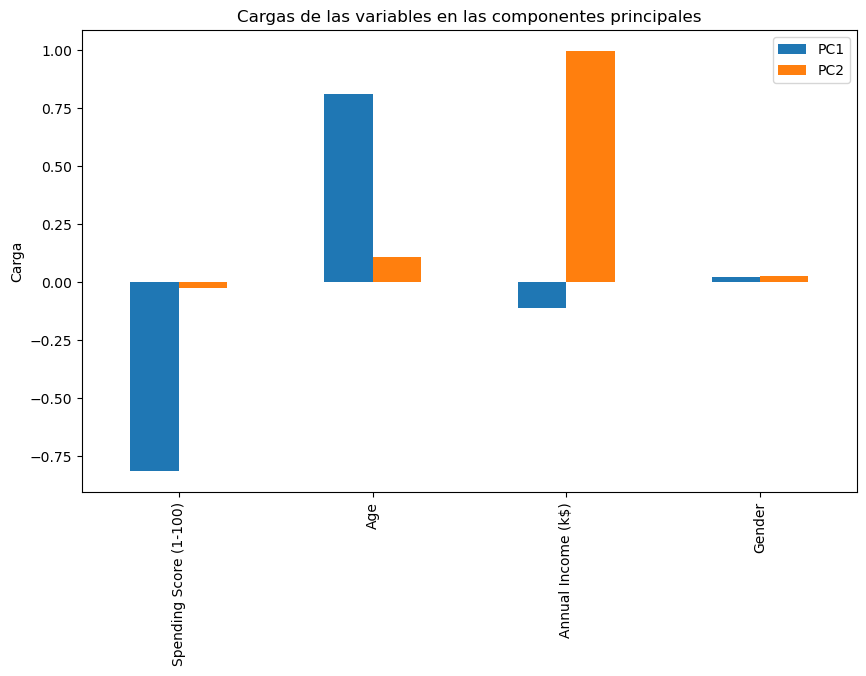

Porcentaje de explicación de PC1: 40.83%
Porcentaje de explicación de PC2: 30.79%


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ajuste PCA con 2 dimensiones
pca = PCA(n_components=2)
pc_scores = pca.fit_transform(dummy_cont_sc)

# Calcular las cargas de las variables en las componentes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con las cargas de las variables en las componentes
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=dummy_cont_sc.columns)

# Ordenar las variables por su carga en la primera componente principal
loadings_df['abs_PC1'] = np.abs(loadings_df['PC1'])
loadings_df = loadings_df.sort_values(by='abs_PC1', ascending=False).drop(columns='abs_PC1')

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
loadings_df.plot(kind='bar', ax=plt.gca())
plt.ylabel('Carga')
plt.title('Cargas de las variables en las componentes principales')
plt.show()

# Porcentaje de explicación de cada PC
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Porcentaje de explicación de PC1: {explained_variance_ratio[0]*100:.2f}%')
print(f'Porcentaje de explicación de PC2: {explained_variance_ratio[1]*100:.2f}%')


### Interpretando ambos PC obtenemos que:
    -En el PC1 observamos que las variables que más explican la variabilidad de los datos son "Spending Score" y "Age", puesto que encontramos dos variables que explican la variabilidad del modelo, esto nos indica que estas dos están muy correlacionadas entre si.
    -En el PC2 observamos que la variable que explica casi la totalidad de la variabilidad de los datos es "Annual Income"

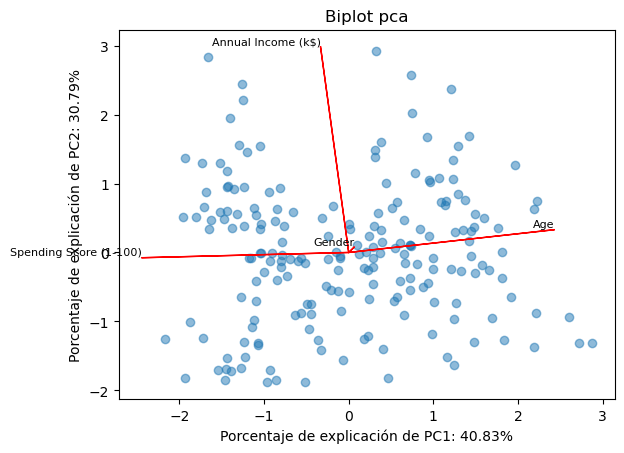

In [139]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de las muestras en el espacio PCA
plt.scatter(pc_scores[:, 0], pc_scores[:, 1], alpha=0.5)

# Dibujar los vectores de las variables (cargas) en el espacio PCA
for i, var in enumerate(dummy_cont_sc.columns):
    plt.arrow(0, 0, loadings_df.loc[var, 'PC1']*3, loadings_df.loc[var, 'PC2']*3, color='r', alpha=1)
    plt.annotate(var, (loadings_df.loc[var, 'PC1']*3, loadings_df.loc[var, 'PC2']*3), fontsize=8, ha='right', va='bottom')

# Configurar los ejes
plt.xlabel(f'Porcentaje de explicación de PC1: {explained_variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Porcentaje de explicación de PC2: {explained_variance_ratio[1]*100:.2f}%')

plt.title('Biplot pca')

# Mostrar el gráfico
plt.show()


### Con el gráfico confirmamos que la variable "Annual Income (k$)" compone casi la totalidad de PC2 y las variables "Spending score" y "Age" componen casi la totalidad de PC1. Observamos que la variable Gender no tiene casi ningún peso en ninguno de los dos PC (como ya podíamos observar en el primer gráfico).
### Con ambos PC se explica algo más del 70% de la variabilidad de los datos.

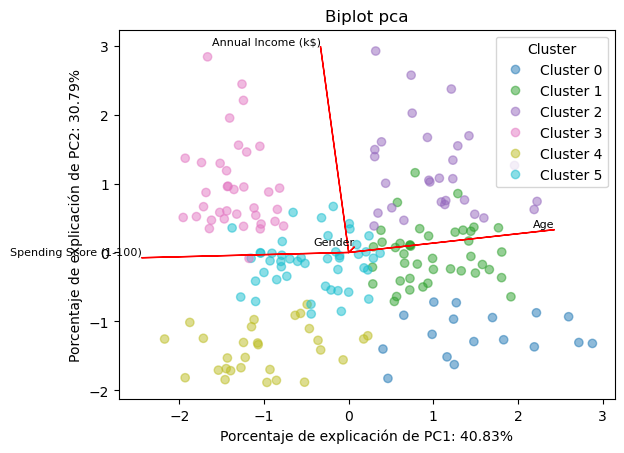

In [148]:
clientes_imputed_iter['PC1'] = pc_scores[:, 0]
clientes_imputed_iter['PC2'] = pc_scores[:, 1]

cmap = plt.get_cmap('tab10')  
scatter = plt.scatter(clientes_imputed_iter['PC1'], clientes_imputed_iter['PC2'], c=clientes_imputed_iter['Cluster'], cmap=cmap, alpha=0.5)

for i, var in enumerate(dummy_cont_sc.columns):
    plt.arrow(0, 0, loadings_df.loc[var, 'PC1']*3, loadings_df.loc[var, 'PC2']*3, color='r', alpha=1)
    plt.annotate(var, (loadings_df.loc[var, 'PC1']*3, loadings_df.loc[var, 'PC2']*3), fontsize=8, ha='right', va='bottom')

plt.xlabel(f'Porcentaje de explicación de PC1: {explained_variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Porcentaje de explicación de PC2: {explained_variance_ratio[1]*100:.2f}%')

plt.title('Biplot pca')

plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(6)], title='Cluster')

plt.show()


### Ya hemos definido el espacio entre los diferentes clusters, de aquí podemos observar que los grupos están bastante bien definidos y presentan las características definidas con anterioridad por cada cluster. 
### Creo que, aunque los clusters están bien definidos, se podrían disminuir quizá en un cluster, tratando de agrupar el cluster 5 entre los diferentes clusters, aunque, reitero que creo que el modelo de 6 clusters se ajusta razonablemente bien a los datos.